In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from core.preprocessing import list_resampler, all_columns

In [2]:
path_results = '../data/processed/Comparison_models.csv'
results = pd.read_csv(path_results)#, index_col = 'index')

In [3]:
results.shape

(96, 9)

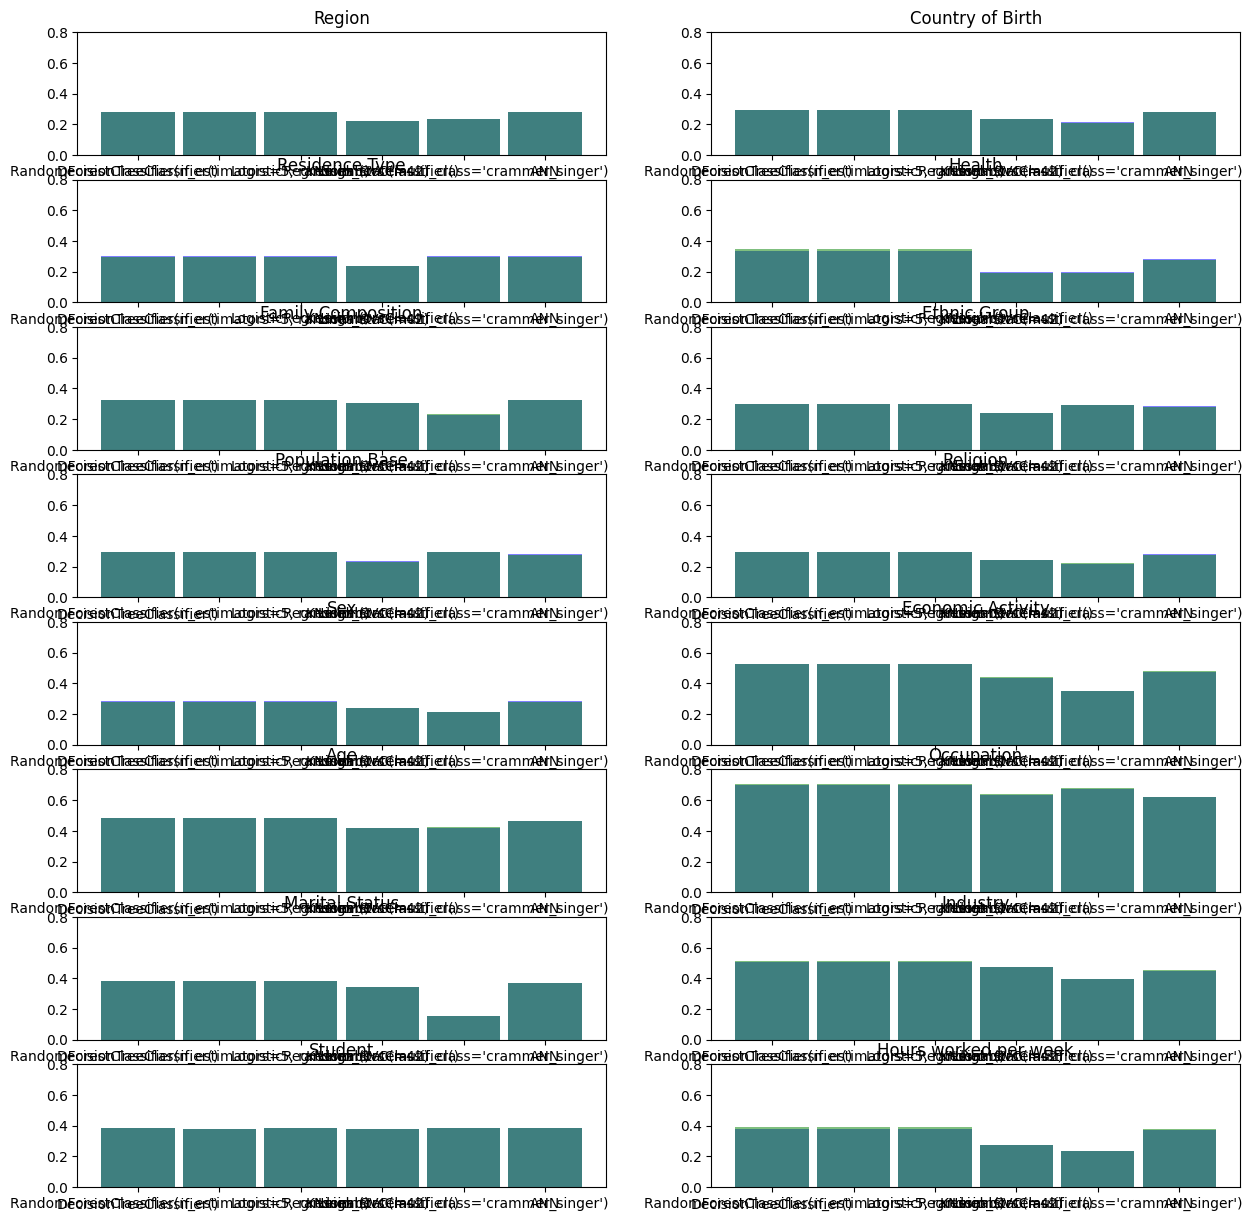

In [4]:
fig_feat, ax_feat = plt.subplots(nrows=8, ncols=2, figsize=(15,15));
for i in range(8):
    for j in range(2):
        col = all_columns[i+j*8]
        mask = (results['Features'].apply(lambda x: col in x))
        data_used = results.loc[mask, ['Model_typ', 'Accuracy_train', 'Accuracy_val']]
        ax_feat[i,j].bar(x=data_used['Model_typ'].values, 
                   height = data_used['Accuracy_train'].values,  width=0.9, color = 'blue', alpha = 0.5)
        ax_feat[i,j].bar(x=data_used['Model_typ'].values, 
                   height = data_used['Accuracy_val'].values, width = 0.9, color = 'green', alpha = 0.5)
        ax_feat[i,j].set_title(col)
        ax_feat[i,j].set_ylim([0, 0.8])


/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_45271/4257650660.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_feat[i,j].set_xticklabels(data_used['Features'].values, rotation=90)
/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_45271/4257650660.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_feat[i,j].set_xticklabels(data_used['Features'].values, rotation=90)
/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_45271/4257650660.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_feat[i,j].set_xticklabels(data_used['Features'].values, rotation=90)
/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_45271/4257650660.py:18: UserWarning: set_ticklabels() should only be used with a fixed

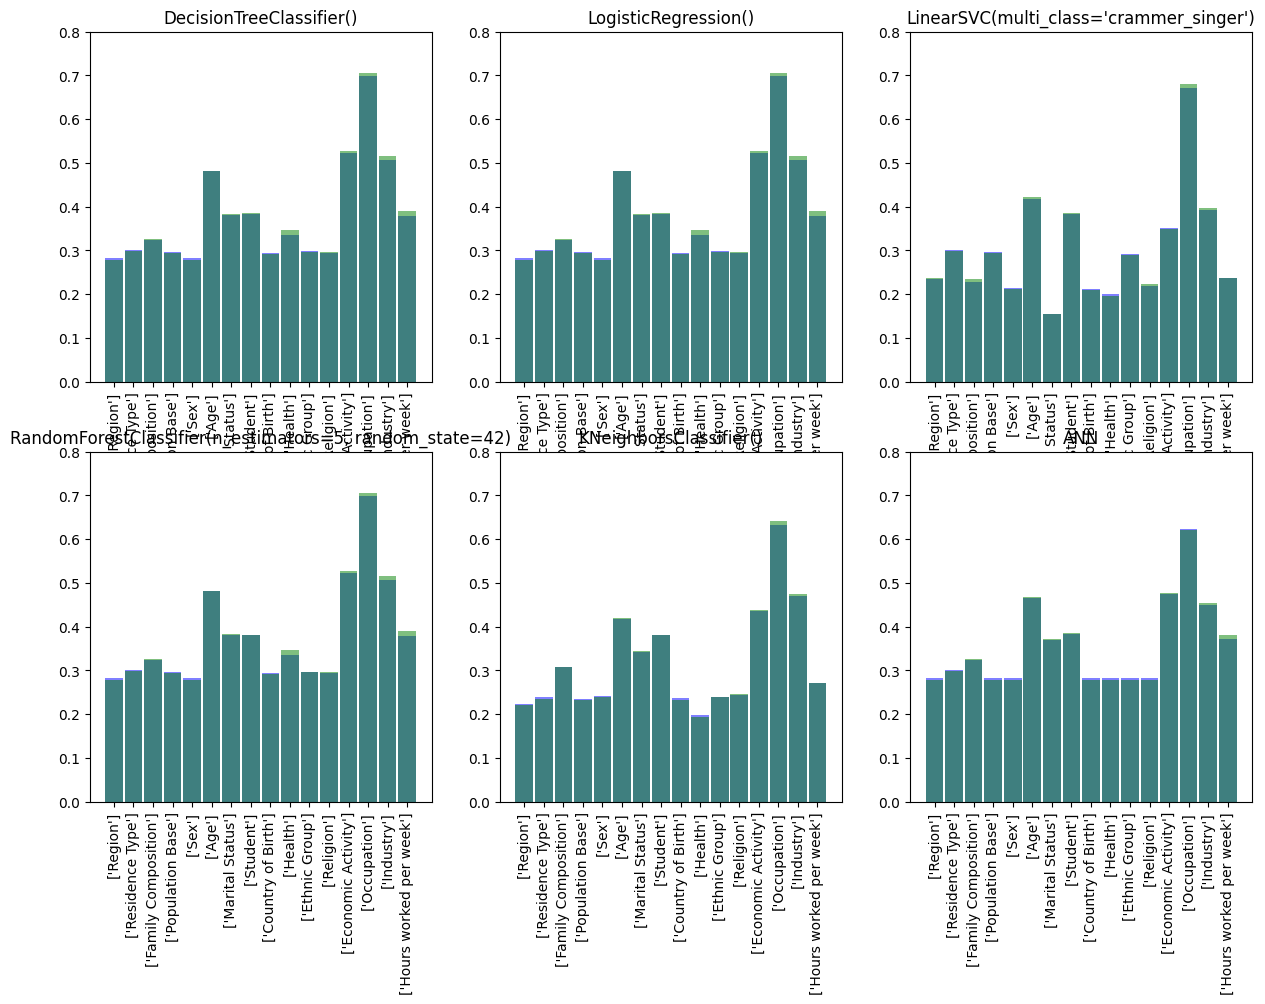

In [5]:
fig_feat, ax_feat = plt.subplots(nrows=2, ncols=3, figsize=(15,10));
all_models = ['DecisionTreeClassifier()',
       'RandomForestClassifier(n_estimators=5, random_state=42)',
       'LogisticRegression()', 'KNeighborsClassifier()',
       "LinearSVC(multi_class='crammer_singer')", 'ANN']
for i in range(2):
    for j in range(3):
       model = all_models[i + 2*j]
       mask = (results['Model_typ'].apply(lambda x: model == x))
       data_used = results.loc[mask, ['Features', 'Accuracy_train', 'Accuracy_val']]
       ax_feat[i,j].bar(x=data_used['Features'].values, 
                   height = data_used['Accuracy_train'].values,  width=0.9, color = 'blue', alpha = 0.5)
       ax_feat[i,j].bar(x=data_used['Features'].values, 
                   height = data_used['Accuracy_val'].values, width = 0.9, color = 'green', alpha = 0.5)
    
       ax_feat[i,j].set_title(model)
       ax_feat[i,j].set_ylim([0, 0.8])
       ax_feat[i,j].set_xticklabels(data_used['Features'].values, rotation=90)

-> Similar patterns appear for the Decision Tree, Random Forest and Logistic Regression.

-> The k nearest neighbours and LinearSVC are different.